In [39]:
import numpy as np
import matplotlib.pyplot as plt

###Задание 1 (Часть 1)

In [40]:
# термы (треугольные)
terms = {
    'm1': (0.7, 0.9, 1.0),
    'm2': (0.5, 0.7, 0.8),
    'm3': (0.3, 0.5, 0.6),
    'm4': (0.1, 0.3, 0.4),
}

def alpha_cut(triangle, alpha):
    """Возвращает альфа-срез треугольного числа [L, U]"""
    a, b, c = triangle
    L = a + alpha * (b - a)
    U = c - alpha * (c - b)
    return L, U

def apply_modifier_to_alpha_cut(alpha_cut_func, p, alpha):
    """Применяет модификатор к альфа-срезу"""
    # альфа-срез становится: A_{альфа^(1/p)}
    new_alpha = alpha ** (1/p)
    return alpha_cut_func(new_alpha)

def centroid_from_alpha_cuts(alpha_cut_func, steps=100):
    """Вычисляет центроид через альфа-срезы"""
    alphas = np.linspace(0, 1, steps)
    sum_L = 0
    sum_U = 0
    for alpha in alphas:
        L, U = alpha_cut_func(alpha)
        sum_L += L
        sum_U += U
    # центроид как среднее средних альфа-срезов
    return (sum_L + sum_U) / (2 * steps)

# альтернатива A1: определённо m1 ИЛИ более-менее m3
def A1_alpha_cut(alpha):
    # определённо m1 (p=2)
    L1, U1 = apply_modifier_to_alpha_cut(lambda a: alpha_cut(terms['m1'], a), 2, alpha)
    # более-менее m3 (p=0.5)
    L2, U2 = apply_modifier_to_alpha_cut(lambda a: alpha_cut(terms['m3'], a), 0.5, alpha)
    # ИЛИ
    L = max(L1, L2)
    U = max(U1, U2)
    return L, U

# альтернатива A2: отчасти m2 (p=0.7)
def A2_alpha_cut(alpha):
    return apply_modifier_to_alpha_cut(lambda a: alpha_cut(terms['m2'], a), 0.7, alpha)

# альтернатива A3: m2 ИЛИ m4
def A3_alpha_cut(alpha):
    L1, U1 = alpha_cut(terms['m2'], alpha)
    L2, U2 = alpha_cut(terms['m4'], alpha)
    L = max(L1, L2)
    U = max(U1, U2)
    return L, U

# альтернатива A4: m3
def A4_alpha_cut(alpha):
    return alpha_cut(terms['m3'], alpha)

# вычисляем центроиды
A1_centroid = centroid_from_alpha_cuts(A1_alpha_cut)
A2_centroid = centroid_from_alpha_cuts(A2_alpha_cut)
A3_centroid = centroid_from_alpha_cuts(A3_alpha_cut)
A4_centroid = centroid_from_alpha_cuts(A4_alpha_cut)

results = {
    'A1': A1_centroid,
    'A2': A2_centroid,
    'A3': A3_centroid,
    'A4': A4_centroid
}

sorted_alternatives = sorted(results.items(), key=lambda x: x[1], reverse=True)

print("Центроиды альтернатив:")
for alt, val in results.items():
    print(f"{alt}: {val:.4f}")

print("Упорядочение:")
for i, (alt, val) in enumerate(sorted_alternatives, 1):
    print(f"{i}. {alt} ({val:.4f})")

Центроиды альтернатив:
A1: 0.8832
A2: 0.6706
A3: 0.6750
A4: 0.4750
Упорядочение:
1. A1 (0.8832)
2. A3 (0.6750)
3. A2 (0.6706)
4. A4 (0.4750)


###Задание 1 (Часть 2)

In [41]:
# веса из условия
weights_A1 = {'m1': 0.65, 'm3': 0.35}
weights_A3 = {'m2': 0.35, 'm4': 0.65}

def weighted_combination(alpha_cuts, weights):
    """Взвешенная комбинация альфа-срезов"""
    L_total = 0
    U_total = 0
    for key, weight in weights.items():
        L, U = alpha_cuts[key]
        L_total += L * weight
        U_total += U * weight
    return L_total, U_total


# альтернатива A1: взвешенная комбинация «определённо m1» и «более-менее m3»
def A1_alpha_cut(alpha):
    alpha_cuts = {}
    # определённо m1 (p=2)
    alpha_cuts['m1'] = apply_modifier_to_alpha_cut(lambda a: alpha_cut(terms['m1'], a), 2, alpha)
    # более-менее m3 (p=0.5)
    alpha_cuts['m3'] = apply_modifier_to_alpha_cut(lambda a: alpha_cut(terms['m3'], a), 0.5, alpha)
    # взвешенная комбинация
    return weighted_combination(alpha_cuts, weights_A1)

# альтернатива A3: взвешенная комбинация m2 и m4
def A3_alpha_cut(alpha):
    alpha_cuts = {}
    alpha_cuts['m2'] = alpha_cut(terms['m2'], alpha)
    alpha_cuts['m4'] = alpha_cut(terms['m4'], alpha)
    # взвешенная комбинация
    return weighted_combination(alpha_cuts, weights_A3)

# вычисляем новые центроиды
A1_centroid = centroid_from_alpha_cuts(A1_alpha_cut)
A3_centroid = centroid_from_alpha_cuts(A3_alpha_cut)

results = {
    'A1': A1_centroid,
    'A2': A2_centroid,
    'A3': A3_centroid,
    'A4': A4_centroid
}

sorted_alternatives = sorted(results.items(), key=lambda x: x[1], reverse=True)

print("Центроиды альтернатив (с учётом весов мнений):")
for alt, val in results.items():
    print(f"{alt}: {val:.4f}")

print("Упорядочение:")
for i, (alt, val) in enumerate(sorted_alternatives, 1):
    print(f"{i}. {alt} ({val:.4f})") # А3 спустилась в рейтинге из-за большого веса метки m4

Центроиды альтернатив (с учётом весов мнений):
A1: 0.7375
A2: 0.6706
A3: 0.4150
A4: 0.4750
Упорядочение:
1. A1 (0.7375)
2. A2 (0.6706)
3. A4 (0.4750)
4. A3 (0.4150)


### Задание 2

In [42]:
class FuzzyMoSCoW:
    def __init__(self):
        self.categories = ['MUST', 'SHOULD', 'COULD', 'WON\'T']

    def membership_MUST(self, x):
        return np.maximum(0, np.minimum(1, (x - 0.7) / 0.2))

    def membership_SHOULD(self, x):
        return np.maximum(0, np.minimum(np.minimum((x - 0.4) / 0.2, (0.8 - x) / 0.2), 1))

    def membership_COULD(self, x):
        return np.maximum(0, np.minimum(np.minimum((x - 0.2) / 0.2, (0.6 - x) / 0.2), 1))

    def membership_WONT(self, x):
        return np.maximum(0, np.minimum(1, (0.3 - x) / 0.2))

    def calculate_membership(self, x):
        return [
            self.membership_MUST(x),
            self.membership_SHOULD(x),
            self.membership_COULD(x),
            self.membership_WONT(x)
        ]

    def aggregate_opinions(self, opinions, weights):
        aggregated = np.zeros(4)
        for opinion, weight in zip(opinions, weights):
            membership = self.calculate_membership(opinion)
            aggregated += np.array(membership) * weight
        return aggregated

fuzzy_moscow = FuzzyMoSCoW()

# пусть будет 5 стейкхолдеров с весами
stakeholders = {
    'product_manager': {'weight': 0.30, 'role': 'Менеджер'},
    'tech_lead': {'weight': 0.25, 'role': 'Техлид'},
    'client': {'weight': 0.20, 'role': 'Клиент'},
    'designer': {'weight': 0.15, 'role': 'Дизайнер'},
    'marketing': {'weight': 0.10, 'role': 'Маркетинг'}
}

# и 5 требований с оценками
requirements = {
    'R1': {'name': 'Онлайн-оплата', 'scores': [9, 6, 9, 8, 8]},
    'R2': {'name': 'Трекинг курьера', 'scores': [6, 4, 8, 7, 7]},
    'R3': {'name': 'Рейтинги ресторанов', 'scores': [3, 3, 5, 6, 8]},
    'R4': {'name': 'Push-уведомления', 'scores': [6, 8, 6, 5, 6]},
    'R5': {'name': 'Предзаказ', 'scores': [3, 1, 3, 4, 5]}
}

# расчёт и вывод результатов
results = []
for req_id, data in requirements.items():
    normalized_scores = [score/10 for score in data['scores']]
    weights = [stakeholders[list(stakeholders.keys())[i]]['weight'] for i in range(5)]

    aggregated = fuzzy_moscow.aggregate_opinions(normalized_scores, weights)
    main_cat = fuzzy_moscow.categories[np.argmax(aggregated)]

    results.append({
        'ID': req_id,
        'Требование': data['name'],
        'MUST': aggregated[0],
        'SHOULD': aggregated[1],
        'COULD': aggregated[2],
        'WON\'T': aggregated[3],
        'Категория': main_cat
    })

    print(f"\n{req_id}: {data['name']}")
    print(f"Оценки стейкхолдеров: {[f'{s}/10' for s in data['scores']]}")
    print(f"Вектор принадлежности: MUST={aggregated[0]:.3f}, SHOULD={aggregated[1]:.3f}, COULD={aggregated[2]:.3f}, WON'T={aggregated[3]:.3f}")
    print(f"Категория: {main_cat}")

print("\nИтоговые результаты:")
for res in results:
    print(f"{res['ID']}: {res['Требование']} - {res['Категория']}")


R1: Онлайн-оплата
Оценки стейкхолдеров: ['9/10', '6/10', '9/10', '8/10', '8/10']
Вектор принадлежности: MUST=0.625, SHOULD=0.250, COULD=0.000, WON'T=0.000
Категория: MUST

R2: Трекинг курьера
Оценки стейкхолдеров: ['6/10', '4/10', '8/10', '7/10', '7/10']
Вектор принадлежности: MUST=0.100, SHOULD=0.425, COULD=0.250, WON'T=0.000
Категория: SHOULD

R3: Рейтинги ресторанов
Оценки стейкхолдеров: ['3/10', '3/10', '5/10', '6/10', '8/10']
Вектор принадлежности: MUST=0.050, SHOULD=0.250, COULD=0.375, WON'T=0.000
Категория: COULD

R4: Push-уведомления
Оценки стейкхолдеров: ['6/10', '8/10', '6/10', '5/10', '6/10']
Вектор принадлежности: MUST=0.125, SHOULD=0.675, COULD=0.075, WON'T=0.000
Категория: SHOULD

R5: Предзаказ
Оценки стейкхолдеров: ['3/10', '1/10', '3/10', '4/10', '5/10']
Вектор принадлежности: MUST=0.000, SHOULD=0.050, COULD=0.450, WON'T=0.250
Категория: COULD

Итоговые результаты:
R1: Онлайн-оплата - MUST
R2: Трекинг курьера - SHOULD
R3: Рейтинги ресторанов - COULD
R4: Push-уведомлени

###Задание 3 (1 часть)

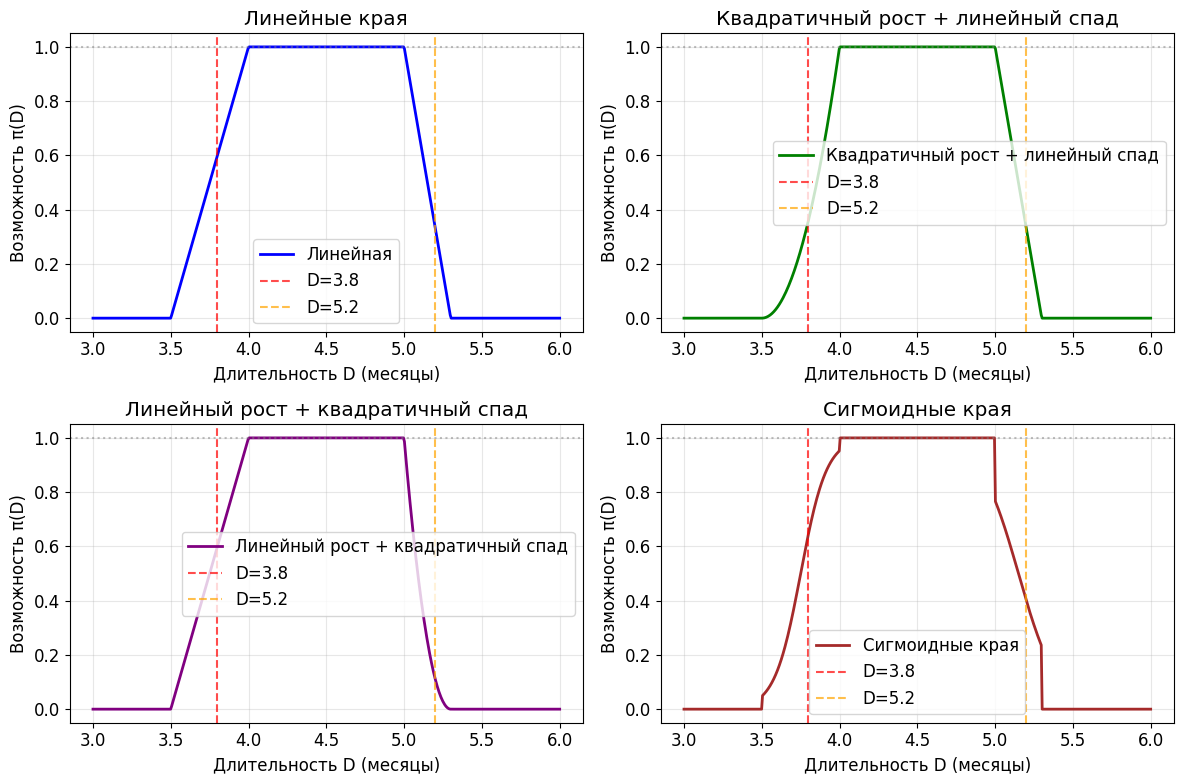

Сравнение возможностей для разных функций (с фиксированным ядром [4,5]):
Функция                        π(3.8)     π(5.2)    
Линейные края                  0.600      0.333     
Квад.рост+лин.спад             0.360      0.333     
Лин.рост+квад.спад             0.600      0.111     
Сигмоидные края                0.646      0.401     


In [43]:
plt.figure(figsize=(12, 8))
D = np.linspace(3.0, 6.0, 500)

# линейная функция
def linear_possibility(D):
    result = np.zeros_like(D)
    mask1 = (D > 3.5) & (D < 4)
    mask2 = (D >= 4) & (D <= 5)      # ядро -
    mask3 = (D > 5) & (D < 5.3)

    result[mask1] = (D[mask1] - 3.5) / 0.5
    result[mask2] = 1
    result[mask3] = (5.3 - D[mask3]) / 0.3
    return result

# квадратичный рост + линейный спад
def quadratic_linear_possibility(D):
    result = np.zeros_like(D)
    mask1 = (D > 3.5) & (D < 4)
    mask2 = (D >= 4) & (D <= 5)
    mask3 = (D > 5) & (D < 5.3)

    result[mask1] = ((D[mask1] - 3.5) / 0.5) ** 2
    result[mask2] = 1
    result[mask3] = (5.3 - D[mask3]) / 0.3
    return result

# линейный рост + квадратичный спад
def linear_quadratic_possibility(D):
    result = np.zeros_like(D)
    mask1 = (D > 3.5) & (D < 4)
    mask2 = (D >= 4) & (D <= 5)
    mask3 = (D > 5) & (D < 5.3)

    result[mask1] = (D[mask1] - 3.5) / 0.5
    result[mask2] = 1
    result[mask3] = ((5.3 - D[mask3]) / 0.3) ** 2
    return result

# сигмоидные края
def sigmoid_edges_possibility(D):
    result = np.zeros_like(D)
    mask1 = (D > 3.5) & (D < 4)
    mask2 = (D >= 4) & (D <= 5)
    mask3 = (D > 5) & (D < 5.3)
    result[mask1] = 1 / (1 + np.exp(-12 * (D[mask1] - 3.75)))
    result[mask2] = 1
    result[mask3] = 1 / (1 + np.exp(8 * (D[mask3] - 5.15)))
    return result

plt.subplot(2, 2, 1)
plt.plot(D, linear_possibility(D), 'b-', linewidth=2, label='Линейная')
plt.axvline(3.8, color='red', linestyle='--', alpha=0.7, label='D=3.8')
plt.axvline(5.2, color='orange', linestyle='--', alpha=0.7, label='D=5.2')
plt.axhline(1, color='gray', linestyle=':', alpha=0.5)
plt.title('Линейные края')
plt.xlabel('Длительность D (месяцы)')
plt.ylabel('Возможность π(D)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(2, 2, 2)
plt.plot(D, quadratic_linear_possibility(D), 'g-', linewidth=2, label='Квадратичный рост + линейный спад')
plt.axvline(3.8, color='red', linestyle='--', alpha=0.7, label='D=3.8')
plt.axvline(5.2, color='orange', linestyle='--', alpha=0.7, label='D=5.2')
plt.axhline(1, color='gray', linestyle=':', alpha=0.5)
plt.title('Квадратичный рост + линейный спад')
plt.xlabel('Длительность D (месяцы)')
plt.ylabel('Возможность π(D)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(2, 2, 3)
plt.plot(D, linear_quadratic_possibility(D), 'purple', linewidth=2, label='Линейный рост + квадратичный спад')
plt.axvline(3.8, color='red', linestyle='--', alpha=0.7, label='D=3.8')
plt.axvline(5.2, color='orange', linestyle='--', alpha=0.7, label='D=5.2')
plt.axhline(1, color='gray', linestyle=':', alpha=0.5)
plt.title('Линейный рост + квадратичный спад')
plt.xlabel('Длительность D (месяцы)')
plt.ylabel('Возможность π(D)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(2, 2, 4)
plt.plot(D, sigmoid_edges_possibility(D), 'brown', linewidth=2, label='Сигмоидные края')
plt.axvline(3.8, color='red', linestyle='--', alpha=0.7, label='D=3.8')
plt.axvline(5.2, color='orange', linestyle='--', alpha=0.7, label='D=5.2')
plt.axhline(1, color='gray', linestyle=':', alpha=0.5)
plt.title('Сигмоидные края')
plt.xlabel('Длительность D (месяцы)')
plt.ylabel('Возможность π(D)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# вычисление значений для точек 3.8 и 5.2
print("Сравнение возможностей для разных функций (с фиксированным ядром [4,5]):")
print(f"{'Функция':<30} {'π(3.8)':<10} {'π(5.2)':<10}")

functions = {
    'Линейные края': linear_possibility,
    'Квад.рост+лин.спад': quadratic_linear_possibility,
    'Лин.рост+квад.спад': linear_quadratic_possibility,
    'Сигмоидные края': sigmoid_edges_possibility
}

for name, func in functions.items():
    pi_38 = func(np.array([3.8]))[0]
    pi_52 = func(np.array([5.2]))[0]
    print(f"{name:<30} {pi_38:<10.3f} {pi_52:<10.3f}")

### Задание 3 (Часть 2)

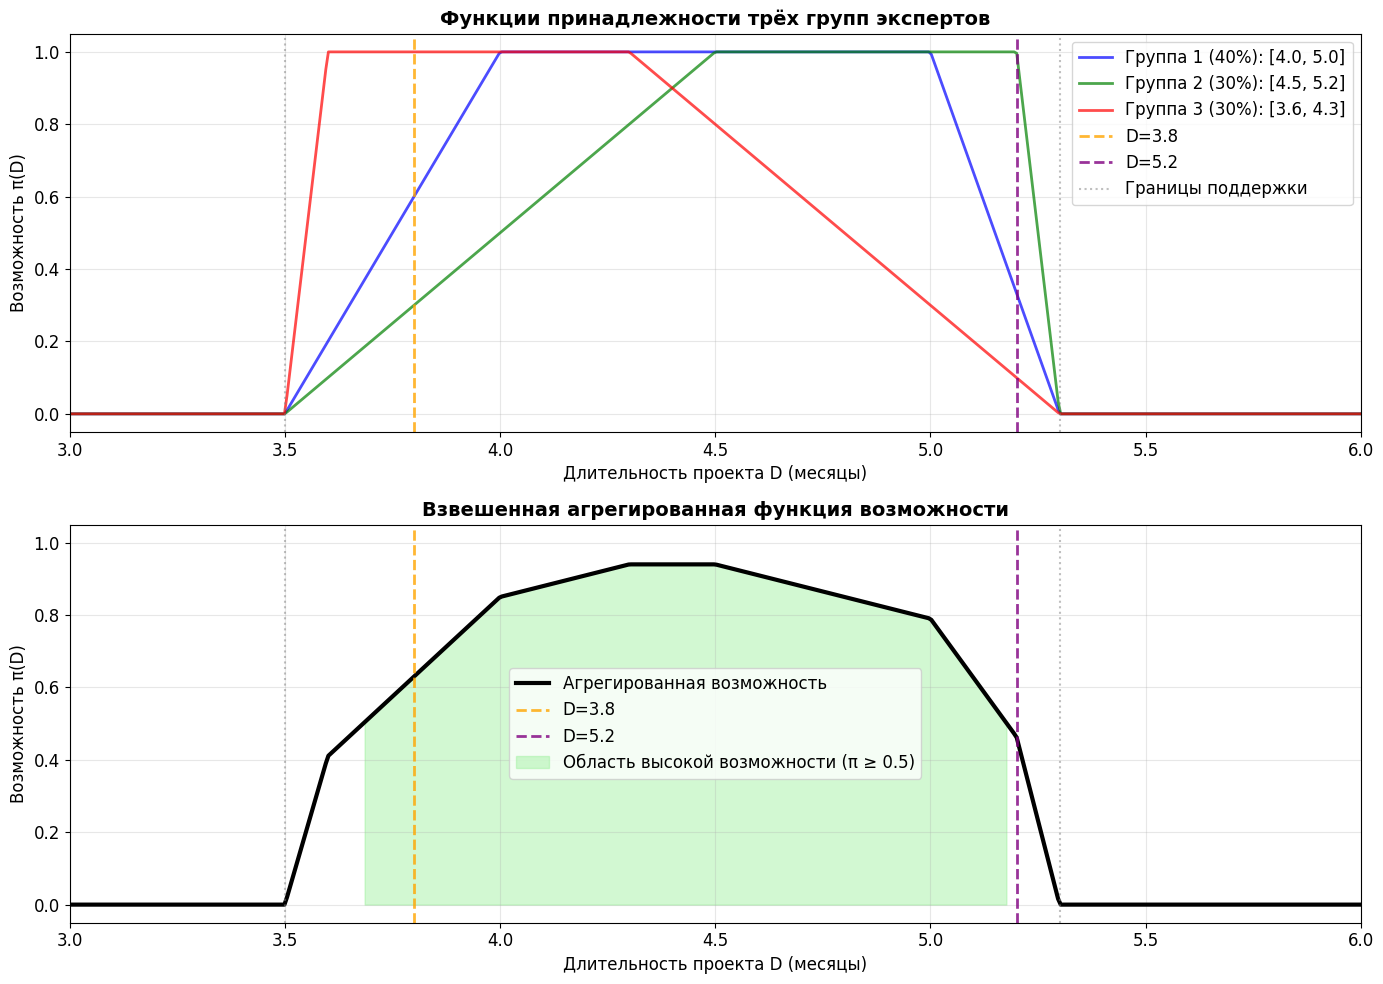


Значения функций принадлежности для каждой группы экспертов:
Группа 1: 40%       [4.0, 5.0]      0.600      0.333     
Группа 2: 30%       [4.5, 5.2]      0.300      1.000     
Группа 3: 30%       [3.6, 4.3]      1.000      0.100     
взвешенная сумма          1.0                      0.630      0.463     
Возможность того, что D(P) = 3.8 месяца: π = 0.630
Возможность того, что D(P) = 5.2 месяца: π = 0.463


In [44]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['font.size'] = 12

weights = [0.4, 0.3, 0.3]  # Веса групп экспертов
intervals = [
    [4.0, 5.0],   # Группа 1
    [4.5, 5.2],   # Группа 2
    [3.6, 4.3]    # Группа 3
]

support_min, support_max = 3.5, 5.3
D = np.linspace(3.0, 6.0, 500)

def trapezoidal_membership(D, core_start, core_end, support_start, support_end):
    """Трапециевидная функция принадлежности с линейными краями"""
    result = np.zeros_like(D)


    mask_left = (D >= support_start) & (D < core_start)
    result[mask_left] = (D[mask_left] - support_start) / (core_start - support_start)

    # Ядро
    mask_core = (D >= core_start) & (D <= core_end)
    result[mask_core] = 1.0

    mask_right = (D > core_end) & (D <= support_end)
    result[mask_right] = (support_end - D[mask_right]) / (support_end - core_end)

    return result

# вычисление функций принадлежности для каждой группы
membership_functions = []
for i, (core_start, core_end) in enumerate(intervals):
    mu = trapezoidal_membership(D, core_start, core_end, support_min, support_max)
    membership_functions.append(mu)

# взвешенная агрегированная функция
aggregated_membership = np.zeros_like(D)
for i, weight in enumerate(weights):
    aggregated_membership += weight * membership_functions[i]

plt.figure(figsize=(14, 10))

# график 1: Функции принадлежности каждой группы
plt.subplot(2, 1, 1)
colors = ['blue', 'green', 'red']
labels = ['Группа 1 (40%): [4.0, 5.0]', 'Группа 2 (30%): [4.5, 5.2]', 'Группа 3 (30%): [3.6, 4.3]']

for i, (mu, color, label) in enumerate(zip(membership_functions, colors, labels)):
    plt.plot(D, mu, color=color, linewidth=2, label=label, alpha=0.7)

plt.axvline(3.8, color='orange', linestyle='--', alpha=0.8, linewidth=2, label='D=3.8')
plt.axvline(5.2, color='purple', linestyle='--', alpha=0.8, linewidth=2, label='D=5.2')
plt.axvline(support_min, color='gray', linestyle=':', alpha=0.5, label='Границы поддержки')
plt.axvline(support_max, color='gray', linestyle=':', alpha=0.5)

plt.title('Функции принадлежности трёх групп экспертов', fontsize=14, fontweight='bold')
plt.xlabel('Длительность проекта D (месяцы)')
plt.ylabel('Возможность π(D)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xlim(3.0, 6.0)
plt.ylim(-0.05, 1.05)

# график 2: Агрегированная функция принадлежности
plt.subplot(2, 1, 2)
plt.plot(D, aggregated_membership, 'black', linewidth=3, label='Агрегированная возможность')
plt.axvline(3.8, color='orange', linestyle='--', alpha=0.8, linewidth=2, label='D=3.8')
plt.axvline(5.2, color='purple', linestyle='--', alpha=0.8, linewidth=2, label='D=5.2')
high_possibility_mask = aggregated_membership >= 0.5
plt.fill_between(D, 0, aggregated_membership, where=high_possibility_mask,
                 color='lightgreen', alpha=0.4, label='Область высокой возможности (π ≥ 0.5)')

plt.axvline(support_min, color='gray', linestyle=':', alpha=0.5)
plt.axvline(support_max, color='gray', linestyle=':', alpha=0.5)

plt.title('Взвешенная агрегированная функция возможности', fontsize=14, fontweight='bold')
plt.xlabel('Длительность проекта D (месяцы)')
plt.ylabel('Возможность π(D)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xlim(3.0, 6.0)
plt.ylim(-0.05, 1.05)

plt.tight_layout()
plt.show()

def calculate_membership(D_val, core_start, core_end):
    """Вычисление значения функции принадлежности в конкретной точке"""
    if D_val < support_min or D_val > support_max:
        return 0.0
    elif core_start <= D_val <= core_end:
        return 1.0
    elif D_val < core_start:
        return (D_val - support_min) / (core_start - support_min)
    else:  # D_val > core_end
        return (support_max - D_val) / (support_max - core_end)

print("\nЗначения функций принадлежности для каждой группы экспертов:")

group_values_38 = []
group_values_52 = []

for i, (weight, interval) in enumerate(zip(weights, intervals)):
    pi_38 = calculate_membership(3.8, interval[0], interval[1])
    pi_52 = calculate_membership(5.2, interval[0], interval[1])
    group_values_38.append(pi_38)
    group_values_52.append(pi_52)

    print(f"Группа {i+1}: {weight*100:.0f}%{'':<6} [{interval[0]}, {interval[1]}]{'':<5} {pi_38:<10.3f} {pi_52:<10.3f}")

# взвешенное агрегирование
final_pi_38 = sum(w * v for w, v in zip(weights, group_values_38))
final_pi_52 = sum(w * v for w, v in zip(weights, group_values_52))
print(f"{'взвешенная сумма':<25} {'1.0':<8} {'':<15} {final_pi_38:<10.3f} {final_pi_52:<10.3f}")
print(f"Возможность того, что D(P) = 3.8 месяца: π = {final_pi_38:.3f}")
print(f"Возможность того, что D(P) = 5.2 месяца: π = {final_pi_52:.3f}")

# интервал высокой возможности
high_possibility_indices = np.where(aggregated_membership >= 0.5)[0]
if len(high_possibility_indices) > 0:
    high_possibility_start = D[high_possibility_indices[0]]
    high_possibility_end = D[high_possibility_indices[-1]]